In [1]:
import pandas as pd
from tqdm import tqdm, tqdm_pandas
import glob
import os
import time
import ast
import numpy as np
import pickle
import h5py
from sktime.forecasting.ets import AutoETS
import sklearn.metrics as metrics
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as mticker
from scipy.signal import savgol_filter

tqdm.pandas()

In [4]:
START_DATE = '2018-12-31'

In [2]:
csv_path = '/home/users/arash/datasets/safegraph/weekly_patterns_2018-12-31_2020-06-08_Houston.csv'
start_poi = 0
end_poi = 420
TOTAL_DAYS = 430

def get_merged_df(csv_path, start_row, end_row):

    #start = time.time()
    merge_df = pd.read_csv(csv_path)

    merge_df = merge_df.sort_values(by=['raw_visit_counts'], ascending=False)
    merge_df = merge_df.iloc[start_row:end_row]
    #print(merge_df)
    merge_df["visits_by_each_hour"] = merge_df["visits_by_each_hour"].apply(lambda x: ast.literal_eval(x))
    merge_df["visits_by_day"] = merge_df["visits_by_day"].apply(lambda x: ast.literal_eval(x))
    # merge_df["visits_by_each_hour"] = merge_df["visits_by_each_hour"].apply(lambda x: x[:TOTAL_DAYS*24])
    # merge_df["visits_by_day"] = merge_df["visits_by_day"].apply(lambda x: x[:TOTAL_DAYS])
    return merge_df
#data_frame = get_merged_df(csv_path=csv_path, num=2000)
data_frame = get_merged_df(csv_path=csv_path, start_row=start_poi, end_row=end_poi)

In [3]:
visits = data_frame['visits_by_day'].apply(lambda x: np.array(x))
visits = np.stack(visits.to_numpy()).T
visits.shape

(532, 420)

In [5]:
date_range = pd.date_range(start=START_DATE, periods=visits.shape[0])
date_range

DatetimeIndex(['2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09',
               ...
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14'],
              dtype='datetime64[ns]', length=532, freq='D')

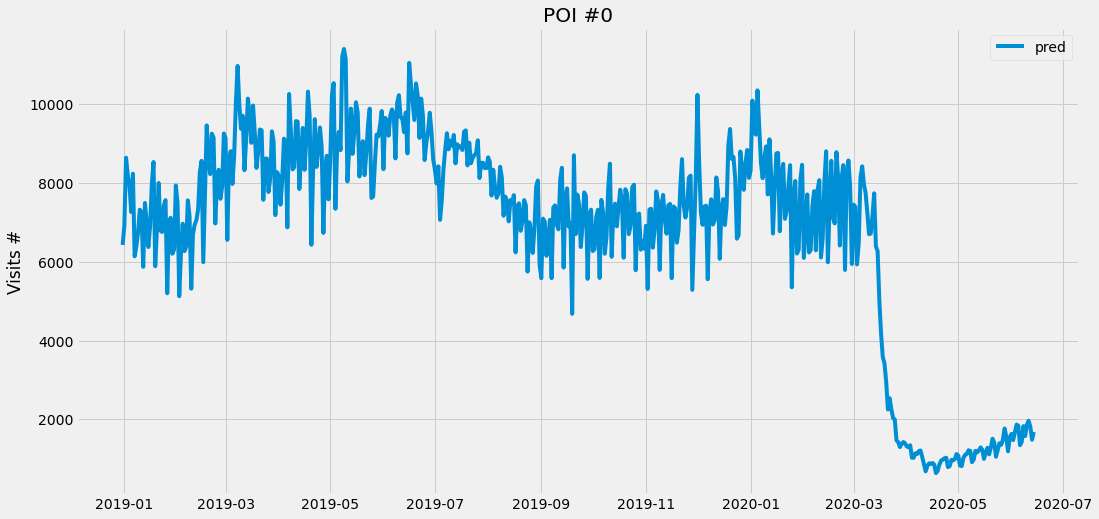

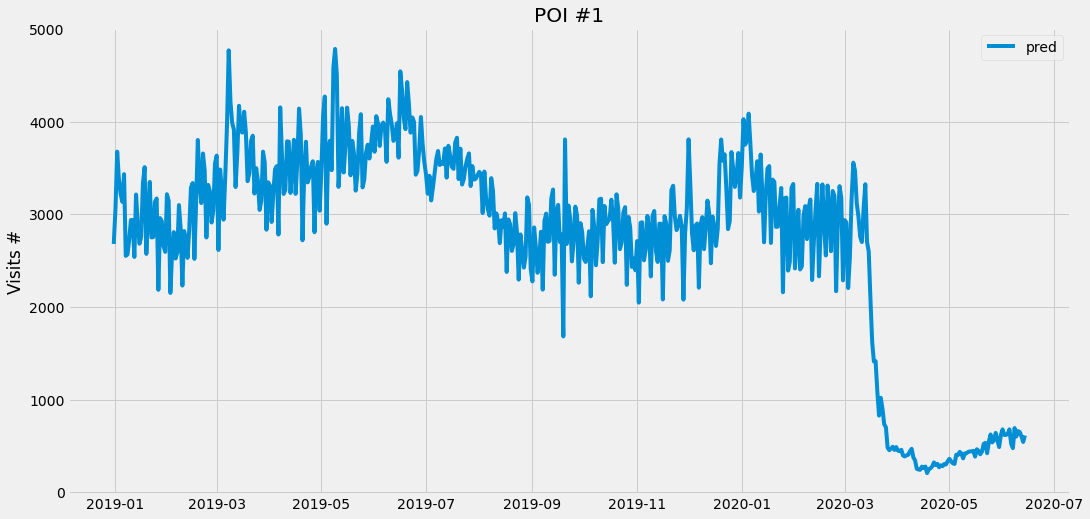

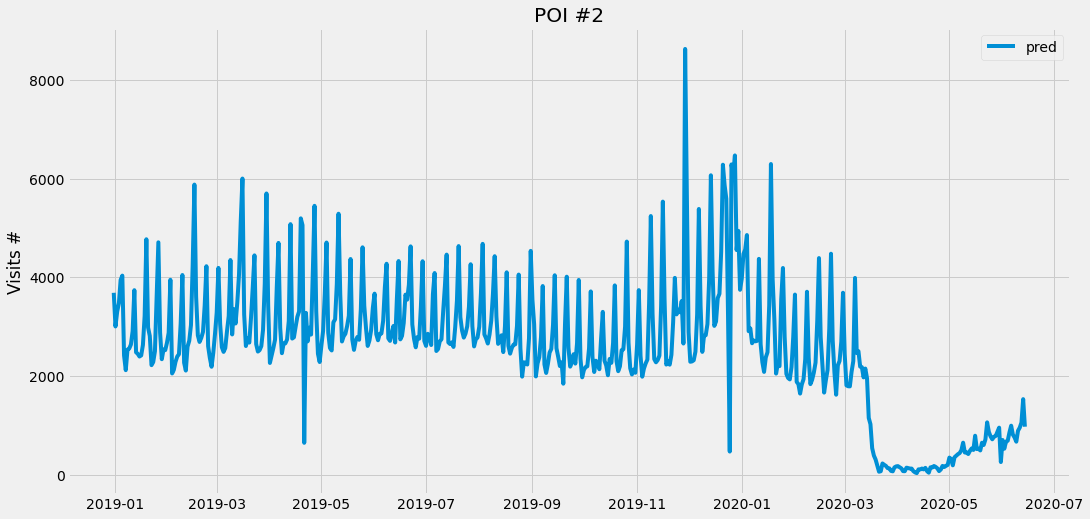

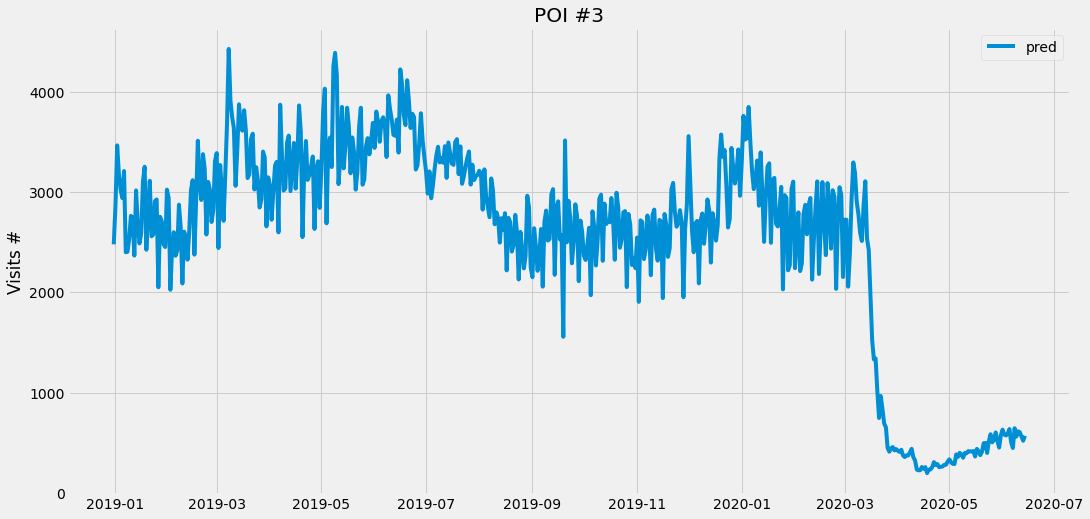

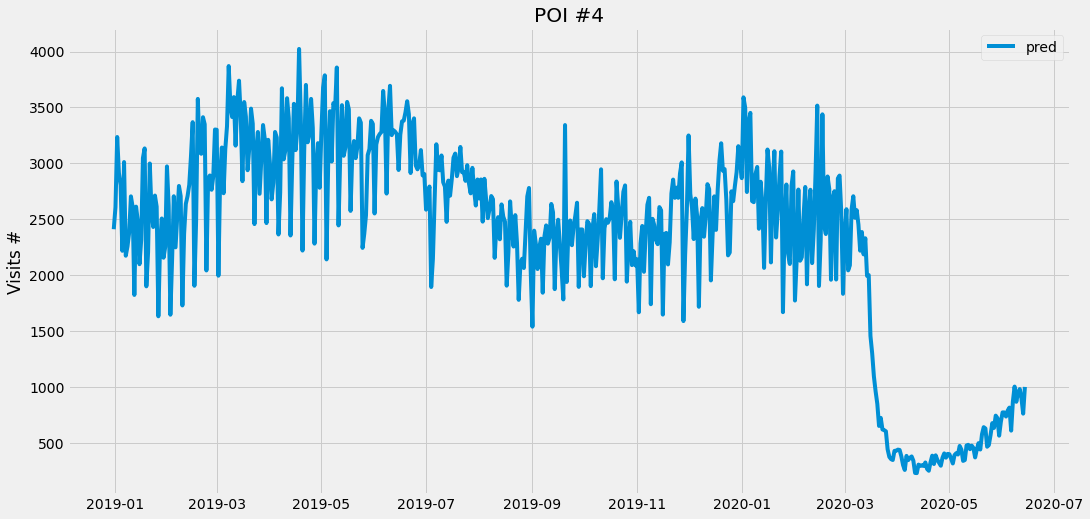

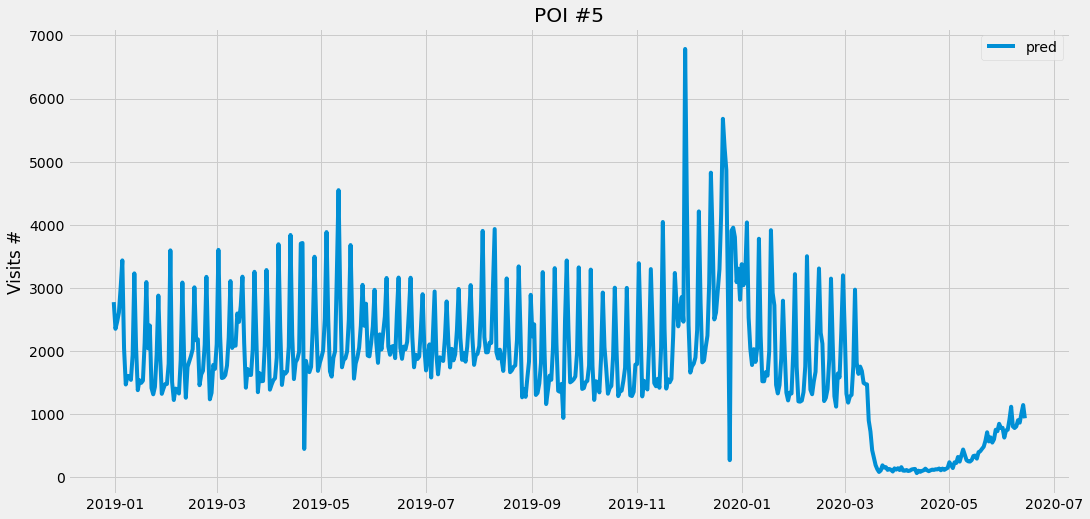

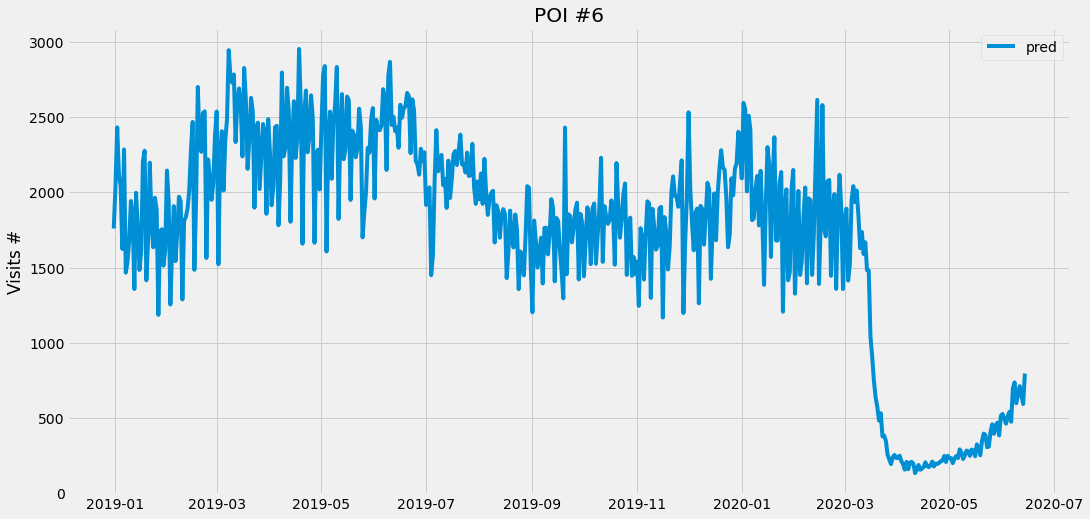

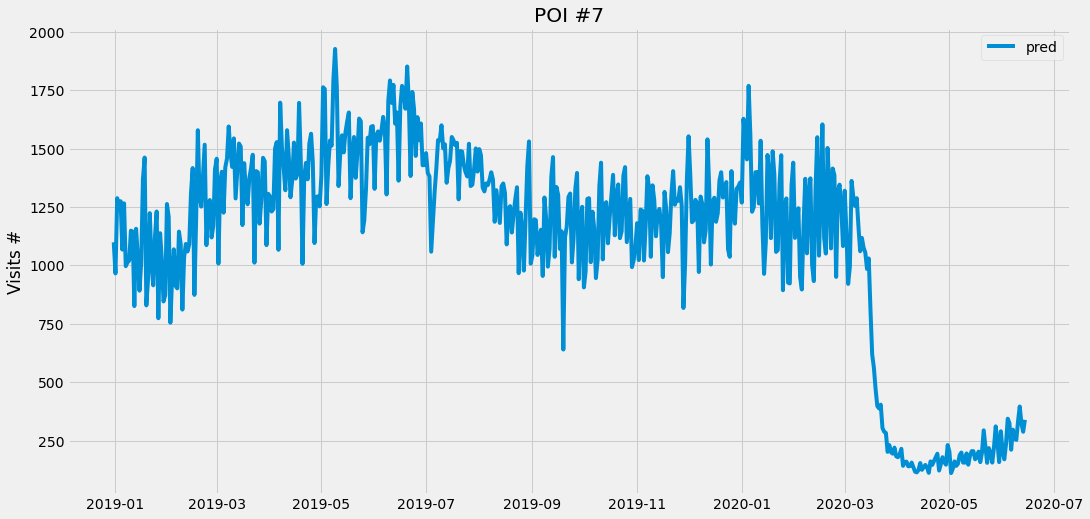

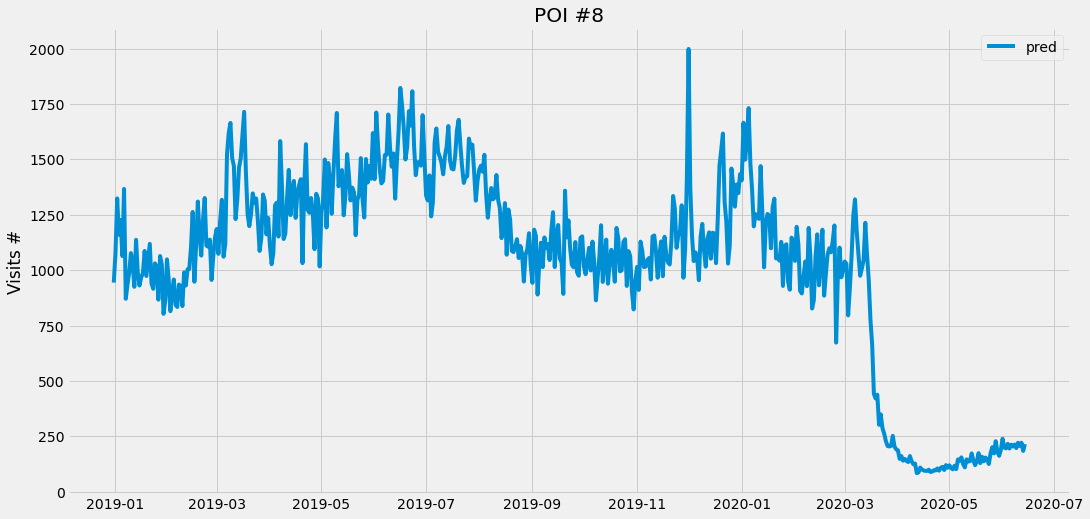

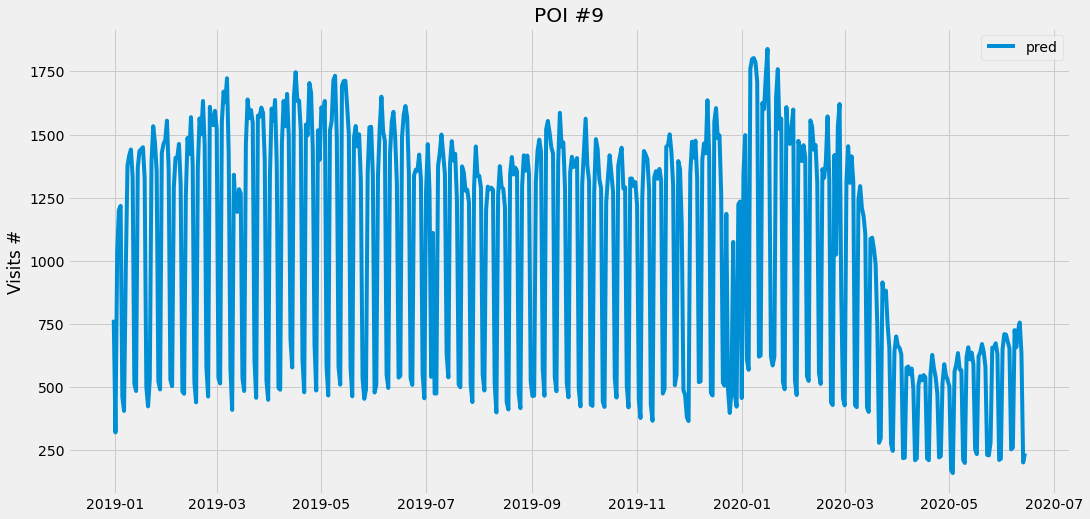

In [9]:
POI_NUM = 0
plt.style.use('fivethirtyeight')
for i in range(10):
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'POI #{POI_NUM}')
    plt.plot(date_range, visits[:, POI_NUM], label='pred')
    plt.legend()
    POI_NUM += 1
    plt.ylabel('Visits #')
    plt.savefig(f"img/data_drift_poi_{POI_NUM}.png", bbox_inches = 'tight')

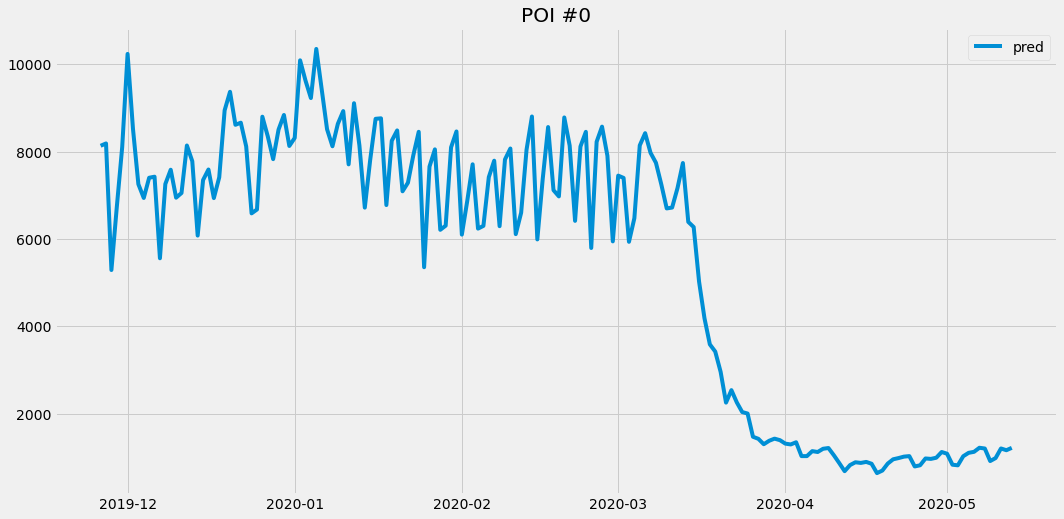

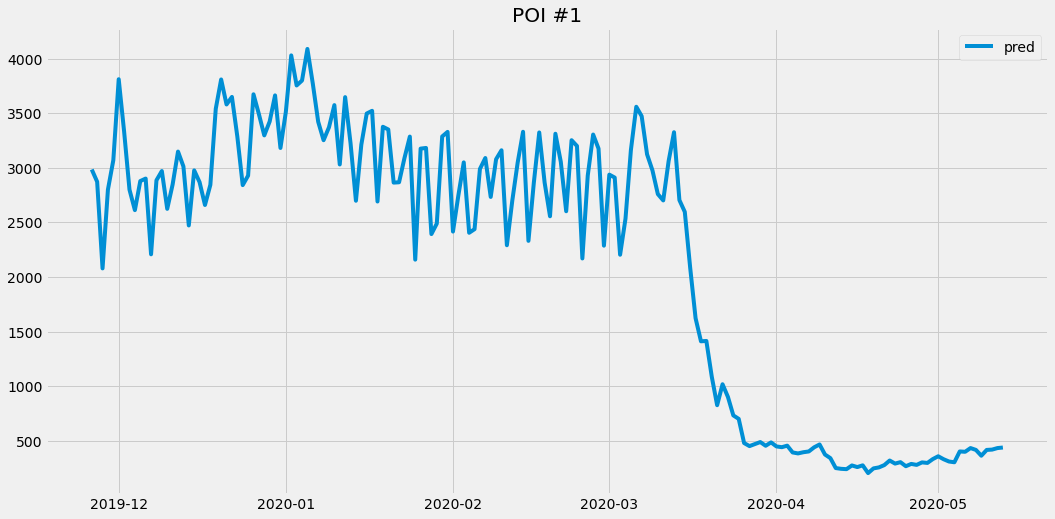

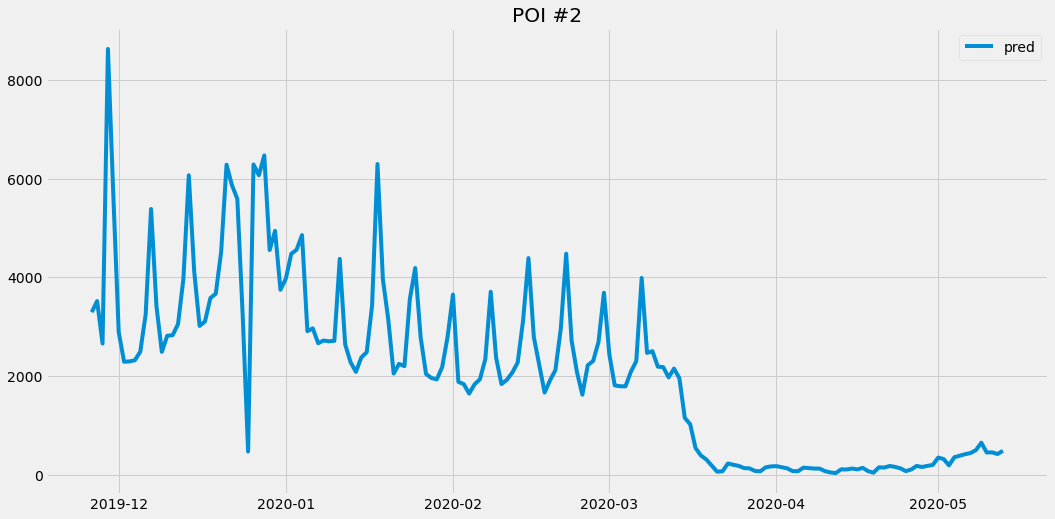

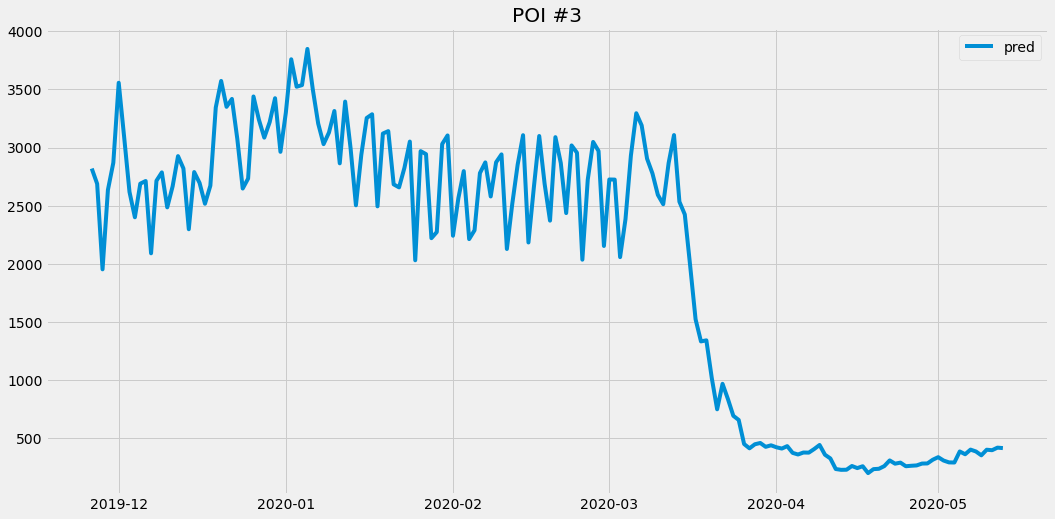

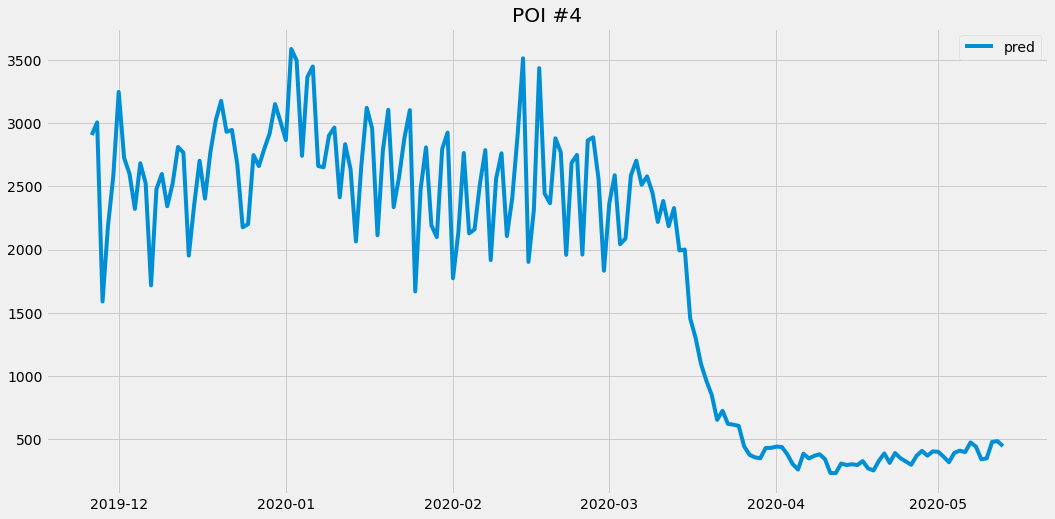

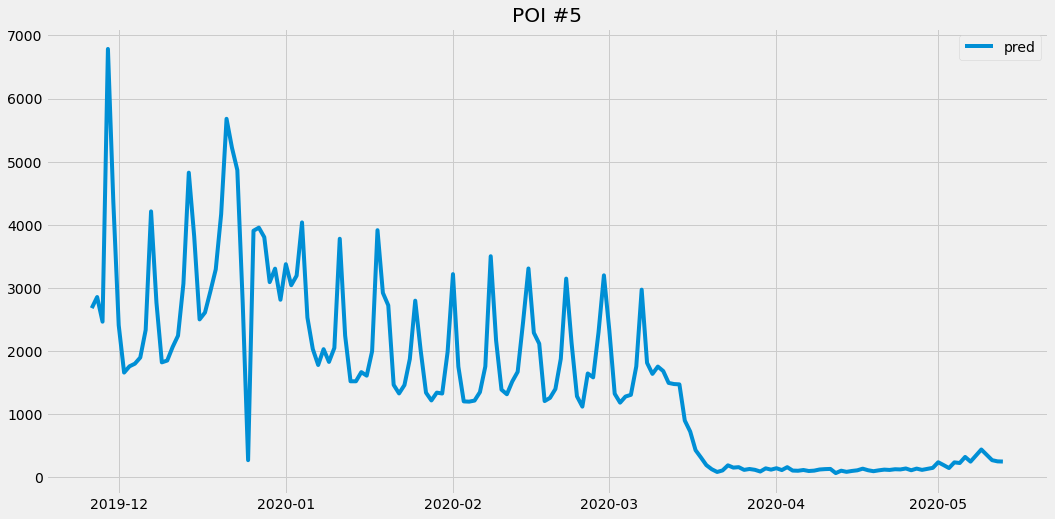

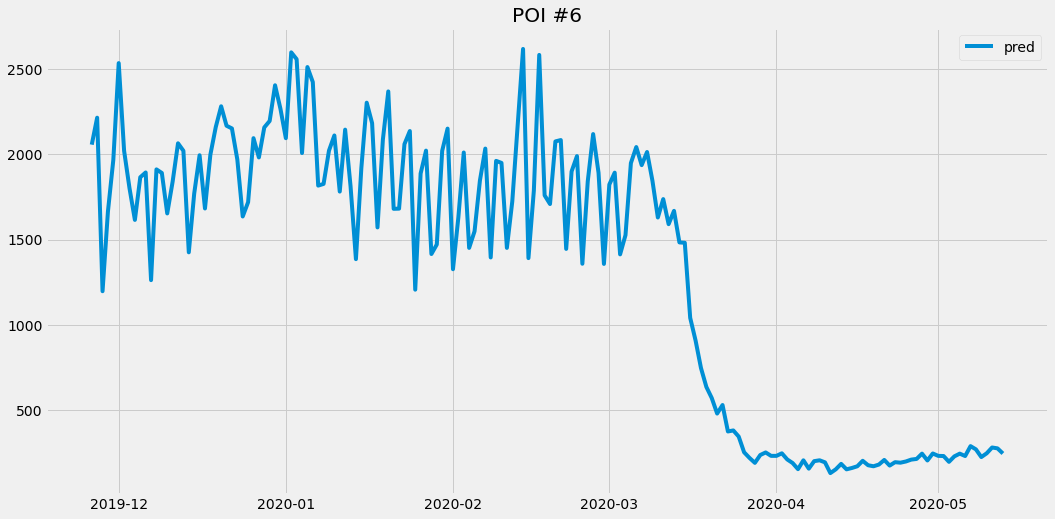

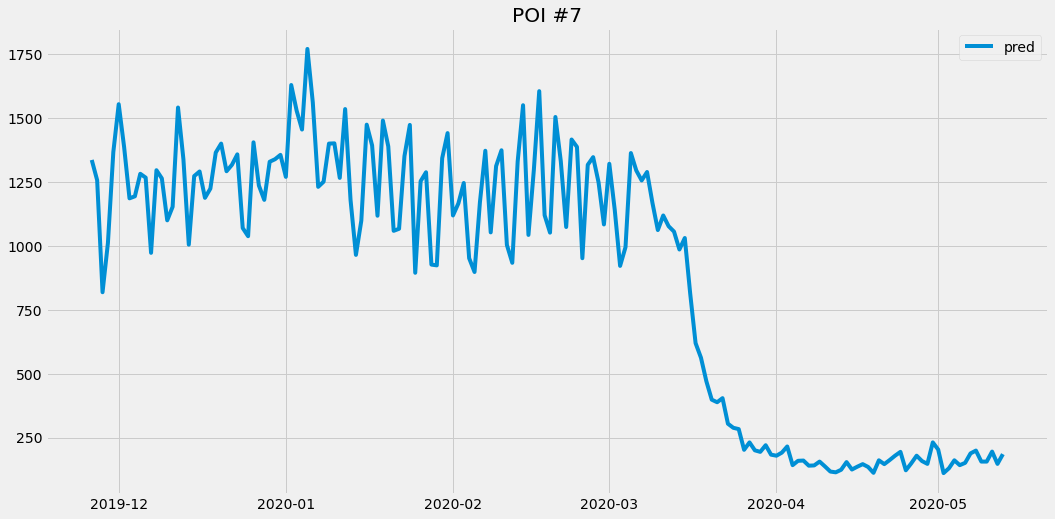

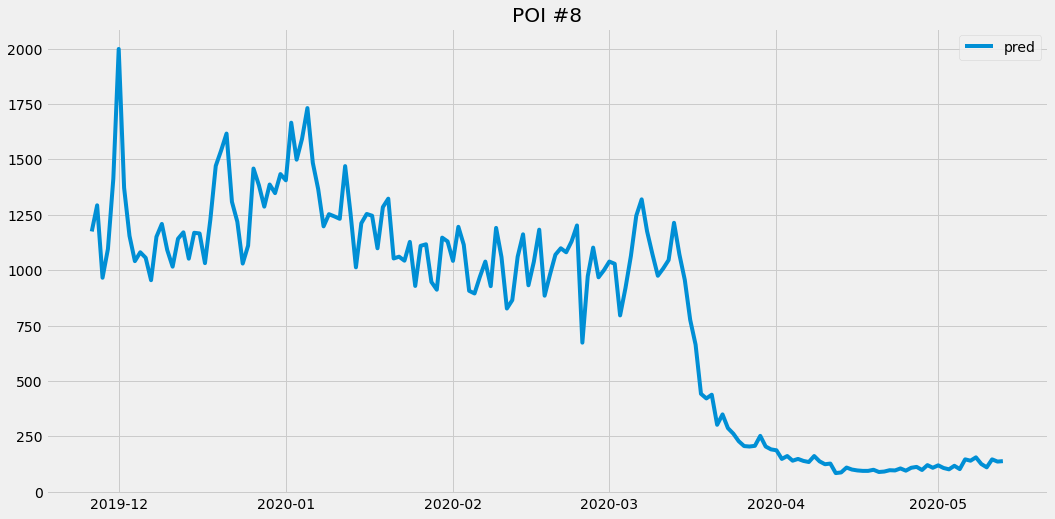

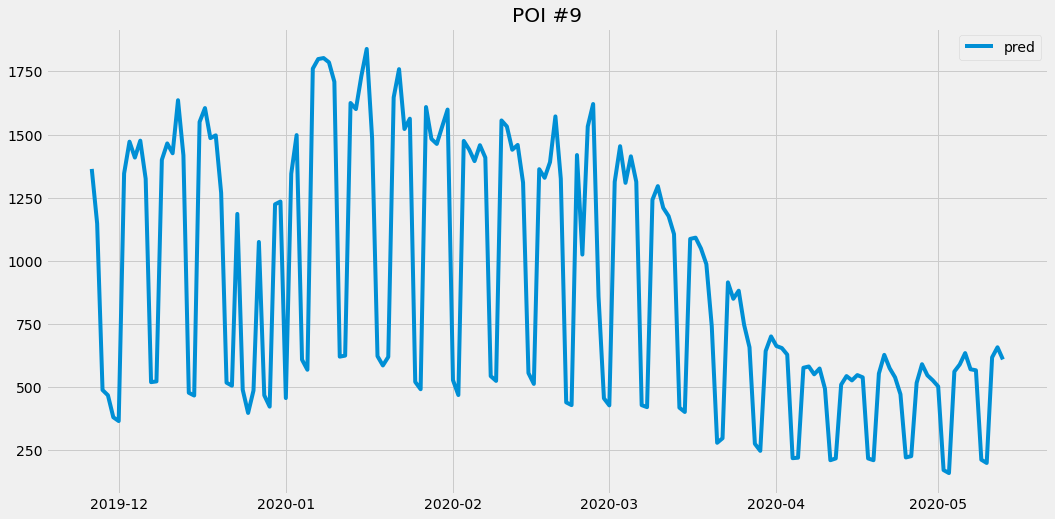

In [13]:
POI_NUM = 0
plt.style.use('fivethirtyeight')
for i in range(10):
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'POI #{POI_NUM}')
    plt.plot(date_range[330:500], visits[330:500, POI_NUM], label='pred')
    plt.legend()
    POI_NUM += 1
    plt.savefig(f"img/data_drift_poi_{POI_NUM}.png", bbox_inches = 'tight')
    # time.sleep(1)

In [6]:
date_format = r'%Y-%m-%d'
shift_offset = 440
start_time = datetime.strptime('2018-12-31', date_format)
end_time = datetime.strptime('2020-06-08', date_format)
change_date = start_time + timedelta(shift_offset)
print('Distributions change from:', change_date)

Distributions change from: 2020-03-15 00:00:00


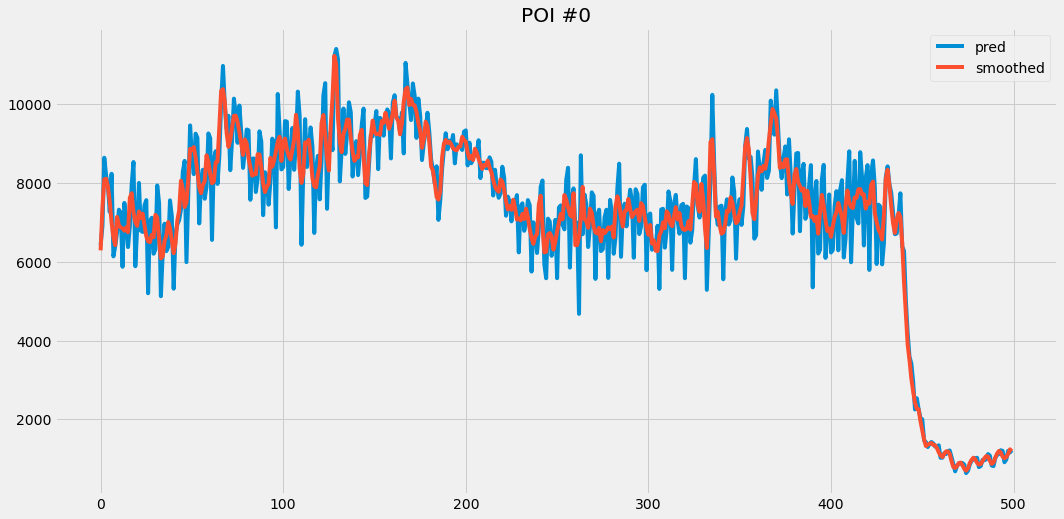

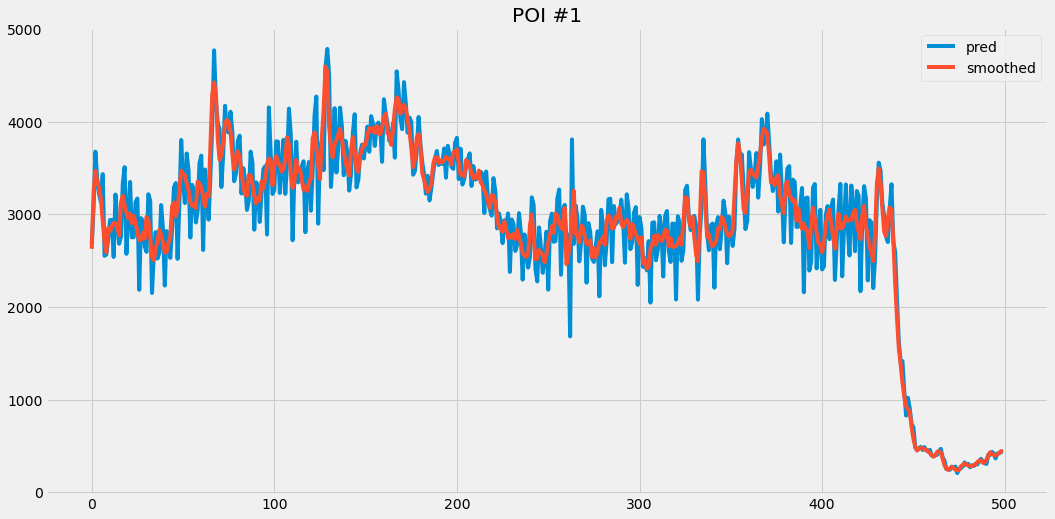

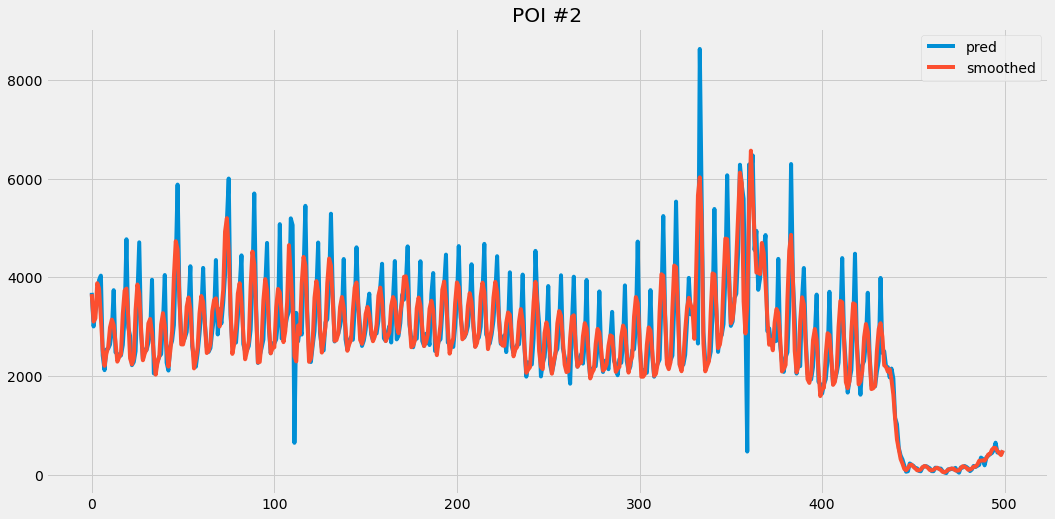

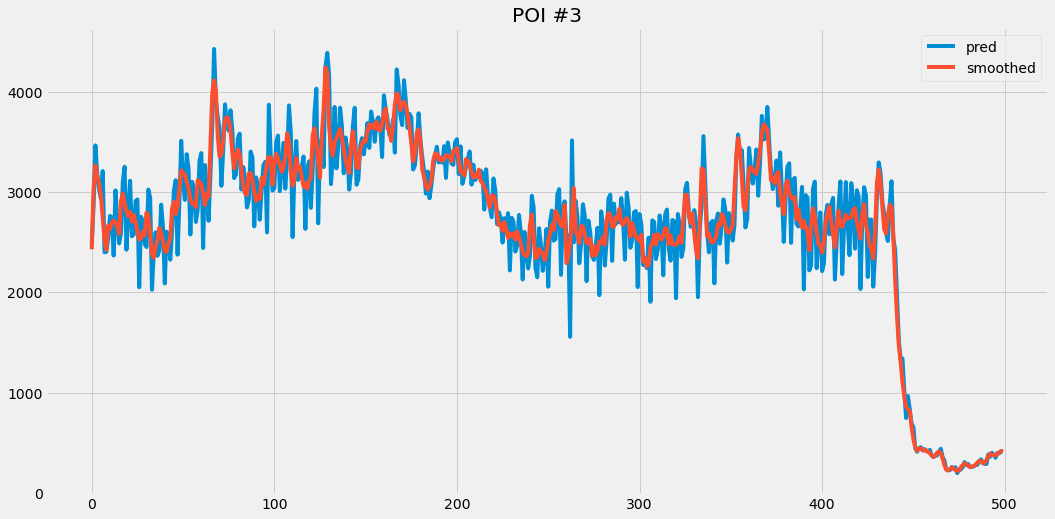

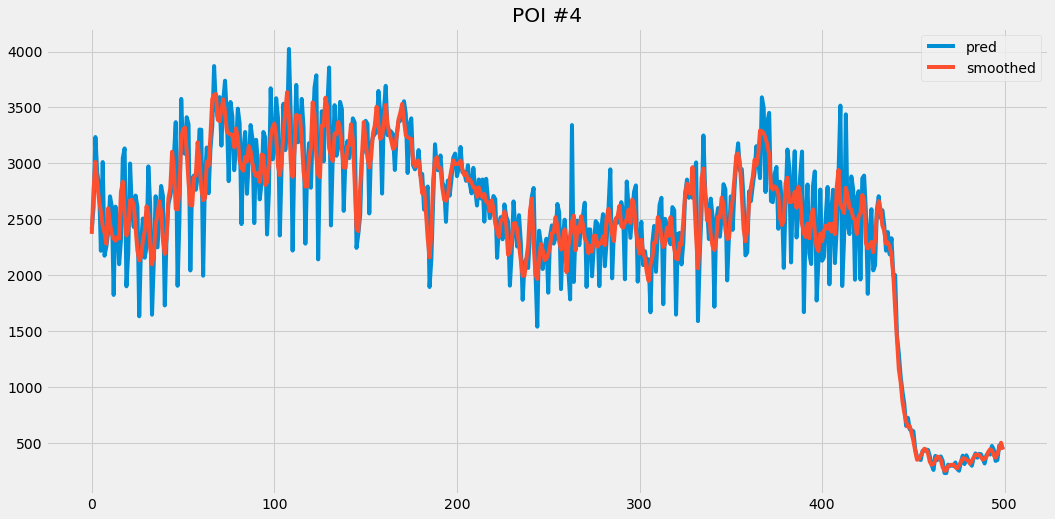

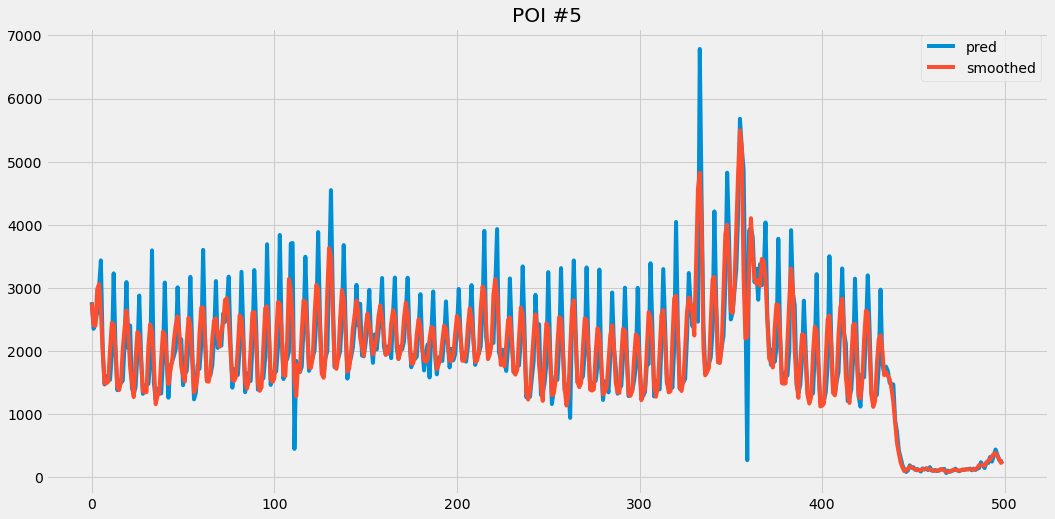

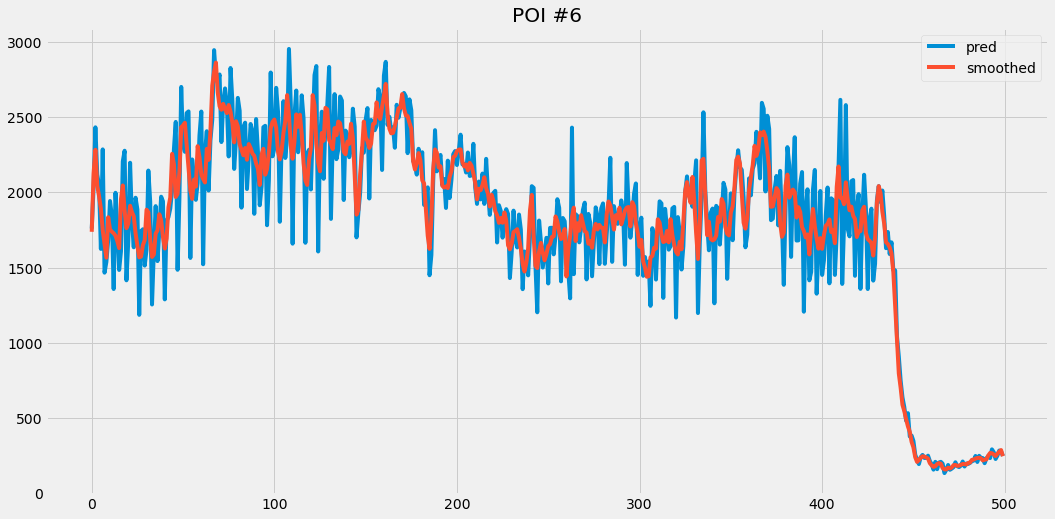

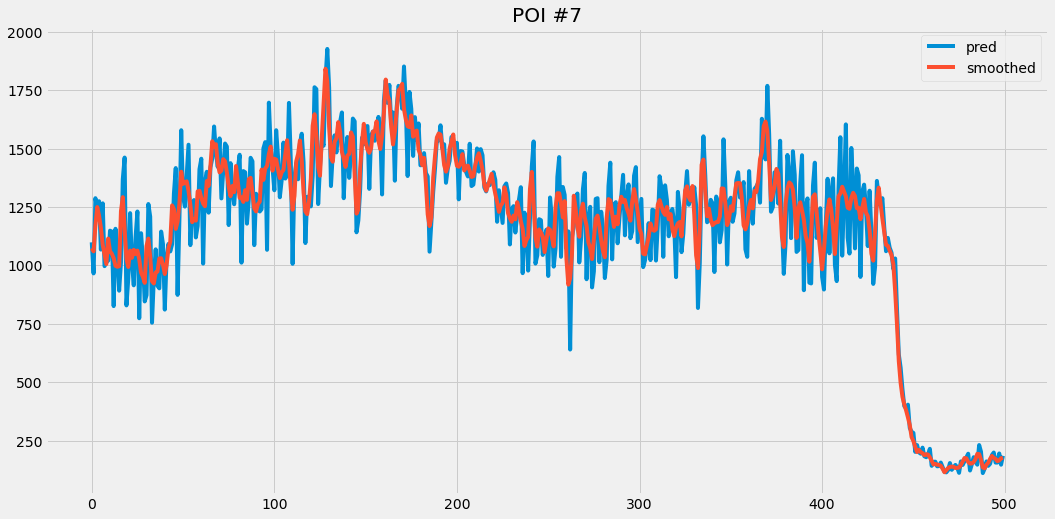

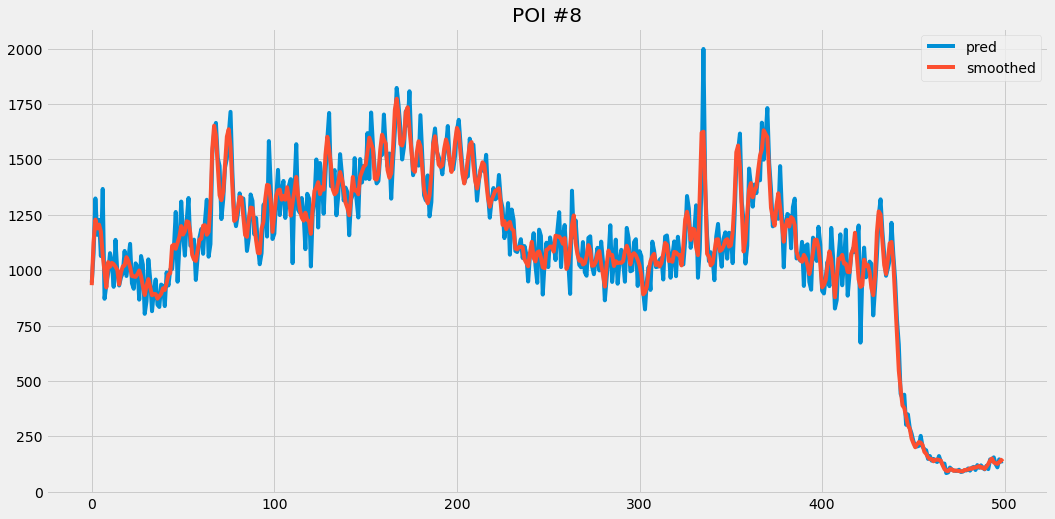

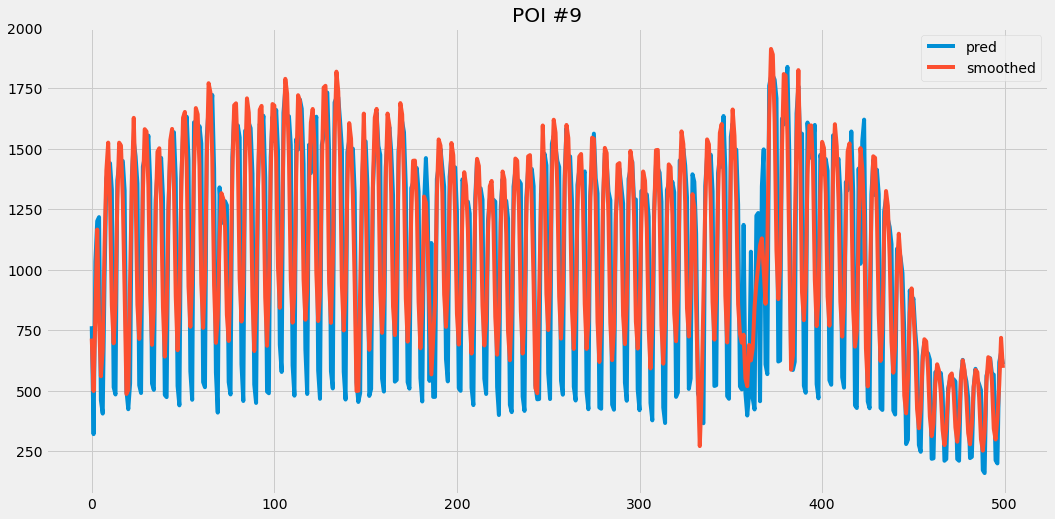

In [37]:
POI_NUM = 0
plt.style.use('fivethirtyeight')
for i in range(10):
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(f'POI #{POI_NUM}')
    plt.plot(visits[:500, POI_NUM], label='pred')
    plt.plot(savgol_filter(visits[:500, POI_NUM], 6, 3), label='smoothed')
    plt.legend()
    POI_NUM += 1
    # time.sleep(1)